In [ ]:
%cd /
from google.colab import drive
drive.mount('/content/gdrive/')

!ln -s /content/gdrive/My\ Drive/ ./mydrive
%cd /content/gdrive/MyDrive/projekt_inzynierski
!ls

/
Mounted at /content/gdrive/
/content/gdrive/MyDrive/projekt_inzynierski
 algoritm_near_finished.ipynb
'analiza danych - praca inzynierska.ipynb'
 artist_similarity.html
 connect-data.ipynb
 dataset-preparation.ipynb
 df_embeddings.parquet
 df_full_with_embeddings.parquet
 df_kaggle_enriched_cleaned.csv
 df_unique_tag_embeddings.parquet
 embedding-files-creation.ipynb
 embeddingi-testy-multilingual-e5-base.ipynb
'embeddingi-testy porownawcze modeli multilingual i eng.ipynb'
 experimets_tags_embeddings.ipynb
 lib
 proj_inz_research.ipynb
 Proptify
 tag_embeddings.npy
 unique_tag_embeddings.npy


# Data import

## Dataset

Dane pochodzą z: https://www.kaggle.com/datasets/undefinenull/million-song-dataset-spotify-lastfm. Zostały pobrane z Last.fm oraz Spotify API. Zawierają tagi dodane przez użytkowników Last.fm oraz dane liczbowe na temat utworów.


---



**track_id** - ID z datasetu

**name** - Nazwa piosenki

**artist** - Wykonawca

**spotify_preview_url** - URL fragmentu utworu w Spotify

**spotify_id** - ID utworu w serwisie Spotify

**tags** - Lista tagów z Last.fm

**genre** - Gatunek

**year** - Rok, w którym został wydany utwór

**duration_ms** - Czas trwania w ms

**danceability** - Opisuje jak bardzo utwór nadaje się do tańca na podstawie m.in. tempa, rytmu. 0 - nienadający się tańca, 1 - taneczny utwór.

**energy** - Energia, intensywność, aktywność utworu. Związana z cechami takimi jak prędkość, głośność.

**key** - Klucz utworu, liczba całkowita. Mapowanie liczba - klucz jest na podstawie "Pitch Class notation". Gdy nie wykryto żadnego klucza wartość to -1.

**loudness** - Głośćność w dB. Średnia głośność na przestrzeni całej długości utworu. Zazwyczaj pomiędzy -60 a 0 dB.

**mode** - Skala: major (1) lub minor (0).

**speechiness** - Procent słow mówionych w piosence. Bliżej 1 są podcasty, a wartości pomiędzy 0,33 a 0,66 to najczęściej utwory zawierające mowę, np. rap.

**acousticness** - Pewność, z jaką utwór jest akustyczny (1 - wysokie prawdopodobieństwo).

**instrumentalness** - Intrumentalność. Im bliżej 1, tym większa pewność, że utwór nie zawiera słów śpiewanych lub rapowanych.

**liveness** - Pewność, z jaką utwór był wykonywany na żywo. Wysokie wartości znaczą, że w nagraniu zostały wykryte odgłosy widowni.

**valence** - Pozytywność. Wysokie wartości (bliżej 1) oznaczają pozytywne utwory, np radosne, euforyczne. Natomiast niskie valence oznacza, że utwór jest negatywny (np. dominuje emocja smutku, złości).

**tempo** - Tempo utworu w BPM.

**time_signature** - Metrum. Określa, liczbę uderzeń w jednym takcie.
Parametr ten przyjmuje wartości od 3 do 7, co odpowiada metrum w zakresie od „3/4” do „7/4”.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("df_kaggle_enriched_cleaned.csv")
df.sample(5)

,track_id,name,artist,spotify_preview_url,tags,genre,year,duration_ms,danceability,energy,...,album_name,popularity,spotify_url,explicit,album_images,spotify_id,n_tempo,n_loudness,tags_list,tags_count
41791,TRDUIAZ128E0781A4E,All Your Sisters,Mazzy Star,https://p.scdn.co/mp3-preview/0bd9ea17ce790933...,"female_vocalists, acoustic",NaN,1996,316706,0.411,0.127,...,Among My Swan,41.0,https://open.spotify.com/track/39CNVSQxYkpF8hG...,False,"[{""height"": 640, ""width"": 640, ""url"": ""https:/...",39CNVSQxYkpF8hGDZ6g3iX,0.555148,0.665614,"['female_vocalists', 'acoustic']",2
49188,TRYIOCH128F93299C1,You Took Advantage Of Me,Carmen McRae,https://p.scdn.co/mp3-preview/76c1b4d2b91a0f40...,jazz,Jazz,1998,158666,0.712,0.164,...,BD Music Presents Carmen McRae,5.0,https://open.spotify.com/track/2buC1POHr2mxtaT...,False,"[{""height"": 640, ""width"": 640, ""url"": ""https:/...",2buC1POHr2mxtaT3gIJCdb,0.473790,0.695170,['jazz'],1
27646,TRVKXSL12903CD94E4,I've Got So Much To Give,Barry White,https://p.scdn.co/mp3-preview/335c003c80a8b677...,"soul, funk",NaN,2009,495893,0.399,0.332,...,Barry White's Greatest Hits,37.0,https://open.spotify.com/track/30BIQMWprmAlVae...,False,"[{""height"": 640, ""width"": 640, ""url"": ""https:/...",30BIQMWprmAlVae1W4BRBw,0.447121,0.774536,"['soul', 'funk']",2
10656,TROKEBZ128F423F8CF,Crying in the Chapel,Elvis Presley,https://p.scdn.co/mp3-preview/cd40e8230633f691...,"classic_rock, american, 60s, oldies",NaN,2002,143106,0.426,0.243,...,Elvis 30 #1 Hits,51.0,https://open.spotify.com/track/1Vzr9AOdHw65UHo...,False,"[{""height"": 640, ""width"": 640, ""url"": ""https:/...",1Vzr9AOdHw65UHoK1Vuxls,0.300216,0.725983,"['classic_rock', 'american', '60s', 'oldies']",4
29233,TRCKEZK128F424EBD8,I'm in Love,Moby,https://p.scdn.co/mp3-preview/56419577f591002b...,"electronic, ambient, house",Rock,2008,222480,0.602,0.641,...,Last Night,36.0,https://open.spotify.com/track/7fjuaYzSC1DhWnN...,False,"[{""height"": 640, ""width"": 640, ""url"": ""https:/...",7fjuaYzSC1DhWnNkQ6SOe7,0.526700,0.809795,"['electronic', 'ambient', 'house']",3


In [ ]:
columns = df.columns.tolist()
columns

['track_id',
 'name',
 'artist',
 'spotify_preview_url',
 'tags',
 'genre',
 'year',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'album_name',
 'popularity',
 'spotify_url',
 'explicit',
 'album_images',
 'spotify_id',
 'n_tempo',
 'n_loudness',
 'tags_list',
 'tags_count']

Normalizacja danych - dane takie jak tempo, loudness normalizujemy do skali 0-1. Pozostałe dane są już w takiej skali.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df["n_tempo"] = scaler.fit_transform(df[["tempo"]])
df["n_loudness"] = scaler.fit_transform(df[["loudness"]])

In [ ]:
df[["name", "artist", "tags", "genre", "tempo", "loudness", "n_tempo", "n_loudness"]].sample(5)

,name,artist,tags,genre,tempo,loudness,n_tempo,n_loudness
45901,On The Bus,Frank Zappa,rock,Rock,111.148,-11.715,0.465259,0.758697
12197,Stranger Than Kindness,Nick Cave & The Bad Seeds,"rock, experimental, 80s, new_wave, post_punk, ...",Electronic,128.472,-14.033,0.537776,0.722275
27683,I Get Lifted,George McCrae,"soul, funk",NaN,100.054,-11.842,0.418820,0.756702
6722,Don't Believe in Love,Dido,"pop, female_vocalists, ambient, singer_songwri...",Rock,90.507,-10.752,0.378857,0.773829
41155,Keep On Walking,Jem,"pop, female_vocalists, soul, lounge",NaN,177.815,-5.156,0.744323,0.861758


Czyszczenie danych

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49766 entries, 0 to 49765
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             49766 non-null  object 
 1   name                 49766 non-null  object 
 2   artist               49766 non-null  object 
 3   spotify_preview_url  49766 non-null  object 
 4   tags                 48687 non-null  object 
 5   genre                21941 non-null  object 
 6   year                 49766 non-null  int64  
 7   duration_ms          49766 non-null  int64  
 8   danceability         49766 non-null  float64
 9   energy               49766 non-null  float64
 10  key                  49766 non-null  int64  
 11  loudness             49766 non-null  float64
 12  mode                 49766 non-null  int64  
 13  speechiness          49766 non-null  float64
 14  acousticness         49766 non-null  float64
 15  instrumentalness     49766 non-null 

Usunięcie NaN

In [ ]:
((df.isna().sum() / len(df)) * 100).round()

,0
track_id,0.0
name,0.0
artist,0.0
spotify_preview_url,0.0
tags,2.0
genre,56.0
year,0.0
duration_ms,0.0
danceability,0.0
energy,0.0


In [ ]:
df[df["spotify_id"].isna()]

,track_id,name,artist,spotify_preview_url,tags,genre,year,duration_ms,danceability,energy,...,album_name,popularity,spotify_url,explicit,album_images,spotify_id,n_tempo,n_loudness,tags_list,tags_count


In [ ]:
df["tags"] = df["tags"].fillna("")
df["genre"] = df["genre"].fillna("")

Tworzymy listę tagów - na potrzeby bazy danych, oraz do dalszej analizy

In [ ]:
df["tags_list"] = df["tags"].apply(lambda x: [t for t in x.split(", ") if t != ''])

df[["name", "artist", "tags", "tags_list"]].sample(5)

,name,artist,tags,tags_list
14843,Mayday!!!,Flobots,"alternative, rap, hip_hop","[alternative, rap, hip_hop]"
32868,Fire On the Mountain,The Marshall Tucker Band,country,[country]
16543,Maslenitsa,Arkona,"black_metal, russian","[black_metal, russian]"
45945,The Three Fates,"Emerson, Lake & Palmer","instrumental, progressive_rock","[instrumental, progressive_rock]"
19940,Die Tonight,Comeback Kid,hardcore,[hardcore]


Sprawdzenie duplikatów

In [ ]:
df[df.duplicated(subset=['spotify_id'], keep=False)]

,track_id,name,artist,spotify_preview_url,tags,genre,year,duration_ms,danceability,energy,...,album_name,popularity,spotify_url,explicit,album_images,spotify_id,n_tempo,n_loudness,tags_list,tags_count


In [ ]:
df['tags_count'] = df['tags_list'].apply(len)

In [ ]:
df['orig_index'] = df.index

df_sorted = df.sort_values(['spotify_id', 'tags_count'], ascending=[True, False])

# drop dupliactes, leave the one with biggest number of tags
df_unique = df_sorted.drop_duplicates(subset='spotify_id', keep='first').reset_index(drop=True)
df = df_unique.sort_values('orig_index').drop(columns='orig_index')

df[df.duplicated(subset=['spotify_id'], keep=False)]

,track_id,name,artist,spotify_preview_url,tags,genre,year,duration_ms,danceability,energy,...,album_name,popularity,spotify_url,explicit,album_images,spotify_id,n_tempo,n_loudness,tags_list,tags_count


In [ ]:
df[df.duplicated(subset=["name", "artist"])]

,track_id,name,artist,spotify_preview_url,tags,genre,year,duration_ms,danceability,energy,...,album_name,popularity,spotify_url,explicit,album_images,spotify_id,n_tempo,n_loudness,tags_list,tags_count


Sprawdzamy, czy tagi są czyste, w formie małych liter, wystarczająco unikalne (bez zbędnych powtórzeń).

In [ ]:
all_tags = df["tags_list"].explode()
tag_counts = all_tags.value_counts()
tag_counts


,count
tags_list,
rock,10567
indie,7152
electronic,6455
alternative,6199
pop,4609
...,...
dark_ambient,583
japanese,450
polish,393


In [ ]:
tags = tag_counts.index.tolist()
tags

['rock',
 'indie',
 'electronic',
 'alternative',
 'pop',
 'female_vocalists',
 'alternative_rock',
 'indie_rock',
 'metal',
 'classic_rock',
 'singer_songwriter',
 'chillout',
 'experimental',
 'ambient',
 'folk',
 'punk',
 'british',
 'hard_rock',
 'instrumental',
 '80s',
 'dance',
 '90s',
 'acoustic',
 'hip_hop',
 'death_metal',
 'jazz',
 'mellow',
 'soul',
 'punk_rock',
 'heavy_metal',
 'beautiful',
 '70s',
 'indie_pop',
 'hardcore',
 '00s',
 'metalcore',
 'love',
 'downtempo',
 'chill',
 'progressive_rock',
 'trip_hop',
 'piano',
 'psychedelic',
 'emo',
 'blues',
 '60s',
 'electro',
 'post_punk',
 'new_wave',
 'industrial',
 'britpop',
 'american',
 'oldies',
 'progressive_metal',
 'funk',
 'male_vocalists',
 'post_hardcore',
 'soundtrack',
 'country',
 'melodic_death_metal',
 'grunge',
 'blues_rock',
 'guitar',
 'rap',
 'lounge',
 'rnb',
 'swedish',
 'thrash_metal',
 'synthpop',
 'reggae',
 'pop_rock',
 'idm',
 'black_metal',
 'techno',
 'gothic',
 'post_rock',
 'screamo',
 'psyc

In [ ]:
df.to_csv("df_kaggle_enriched_cleaned.csv", index=False)

# Analiza danych

In [ ]:
df.shape

(49766, 30)

In [ ]:
df.describe()

,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,n_tempo,n_loudness,tags_count
count,49766.000000,4.976600e+04,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000
mean,2004.008661,2.511567e+05,0.493800,0.686554,5.314050,-8.286426,0.631656,0.075825,0.213723,0.224158,0.215346,0.433672,123.494551,3.899228,33.810573,0.516941,0.812570,3.668267
std,8.887067,1.073006e+05,0.178649,0.251713,3.567868,4.537970,0.482360,0.075660,0.302611,0.336496,0.184658,0.258782,29.605099,0.417627,17.685844,0.123925,0.071305,2.472062
min,1900.000000,1.439000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,1.929060e+05,0.364000,0.514000,2.000000,-10.374000,0.000000,0.035200,0.001403,0.000017,0.098400,0.215000,100.674500,4.000000,21.000000,0.421417,0.779768,2.000000
50%,2006.000000,2.349860e+05,0.498000,0.744000,5.000000,-7.198000,1.000000,0.048100,0.040000,0.005460,0.137000,0.406000,121.981000,4.000000,32.000000,0.510605,0.829672,3.000000
75%,2009.000000,2.880580e+05,0.621000,0.905000,9.000000,-5.088000,1.000000,0.083300,0.340000,0.436000,0.289000,0.635000,141.593250,4.000000,45.000000,0.592701,0.862826,5.000000
max,2022.000000,3.816373e+06,0.986000,1.000000,11.000000,3.642000,1.000000,0.954000,0.996000,0.999000,0.999000,0.993000,238.895000,5.000000,92.000000,1.000000,1.000000,52.000000


In [ ]:
df.select_dtypes(include='object').describe()

,track_id,name,artist,spotify_preview_url,tags,genre,album_name,spotify_url,album_images,spotify_id,tags_list
count,49766,49766,49766,49766,49766,49766,49764,49766,49766,49766,49766
unique,49766,49766,8204,49738,19792,16,19340,49766,20334,49766,19792
top,TRIPFKO128F42383FE,Hide & Seek,The Rolling Stones,https://p.scdn.co/mp3-preview/9f7452ca3193988a...,,,Greatest Hits,https://open.spotify.com/track/3LW19oCCXxiqRcn...,"[{""height"": 640, ""width"": 640, ""url"": ""https:/...",3LW19oCCXxiqRcnlcQqPr3,[]
freq,1,1,131,2,1079,27825,46,1,23,1,1079


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# cols_to_exclude = ['n_loudness', 'n_tempo']
cols_to_exclude = []

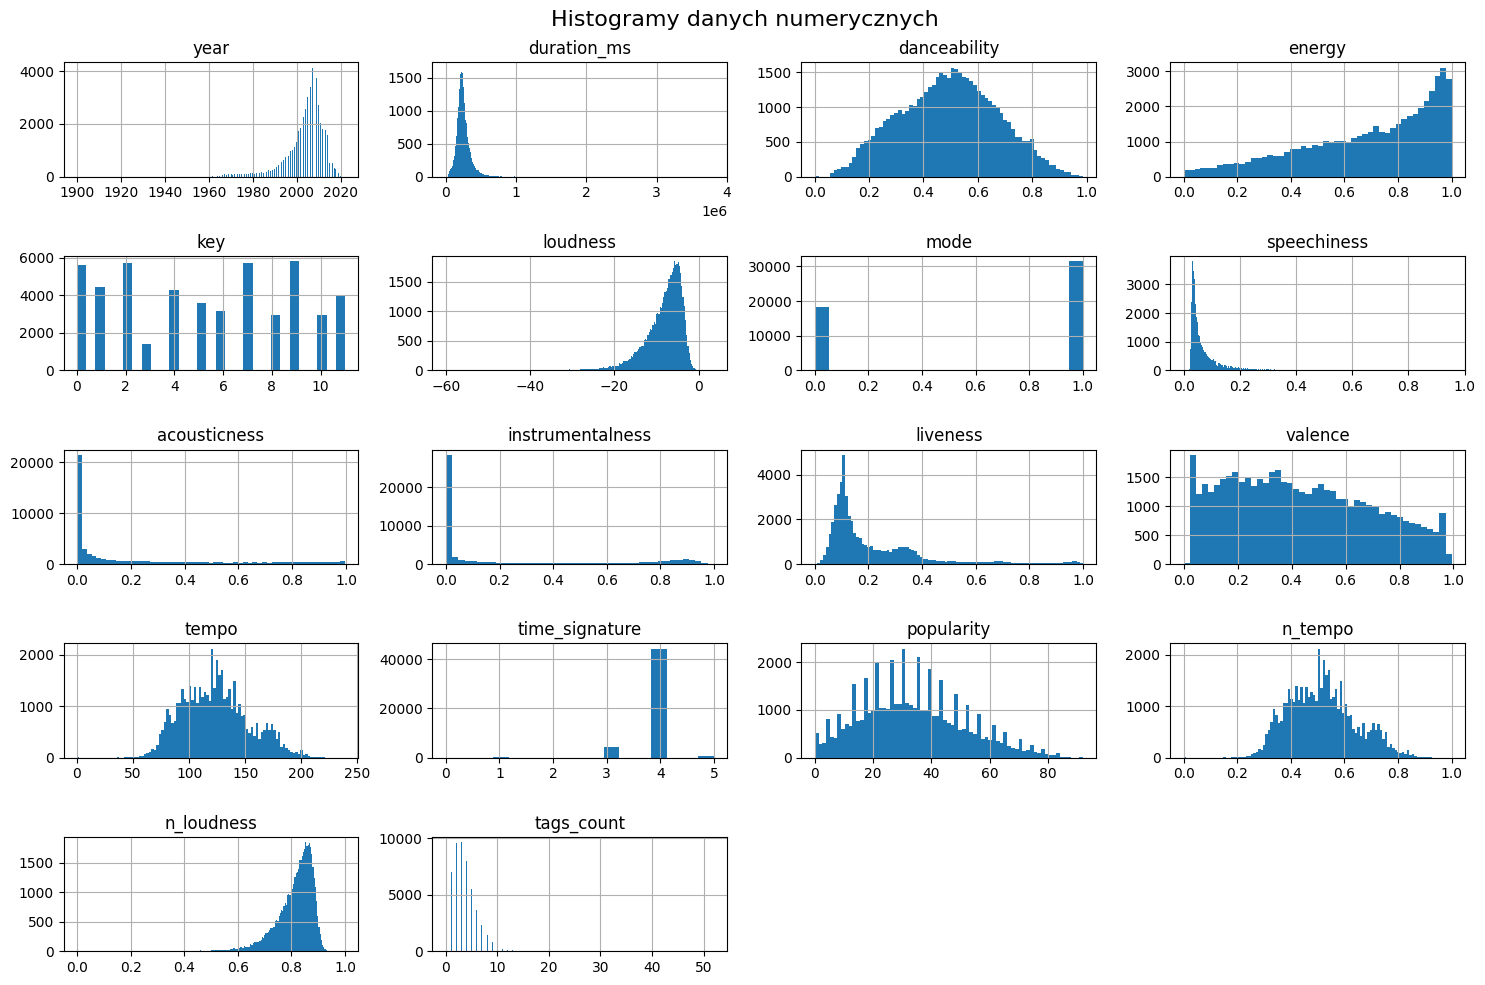

In [ ]:
numeric_data = df.select_dtypes(include=['float64', 'int64']).columns

numeric_data = [col for col in numeric_data if col not in cols_to_exclude]

df[numeric_data].hist(bins='auto', figsize=(15, 10))
plt.suptitle("Histogramy danych numerycznych", fontsize=16)
plt.tight_layout()
plt.show()

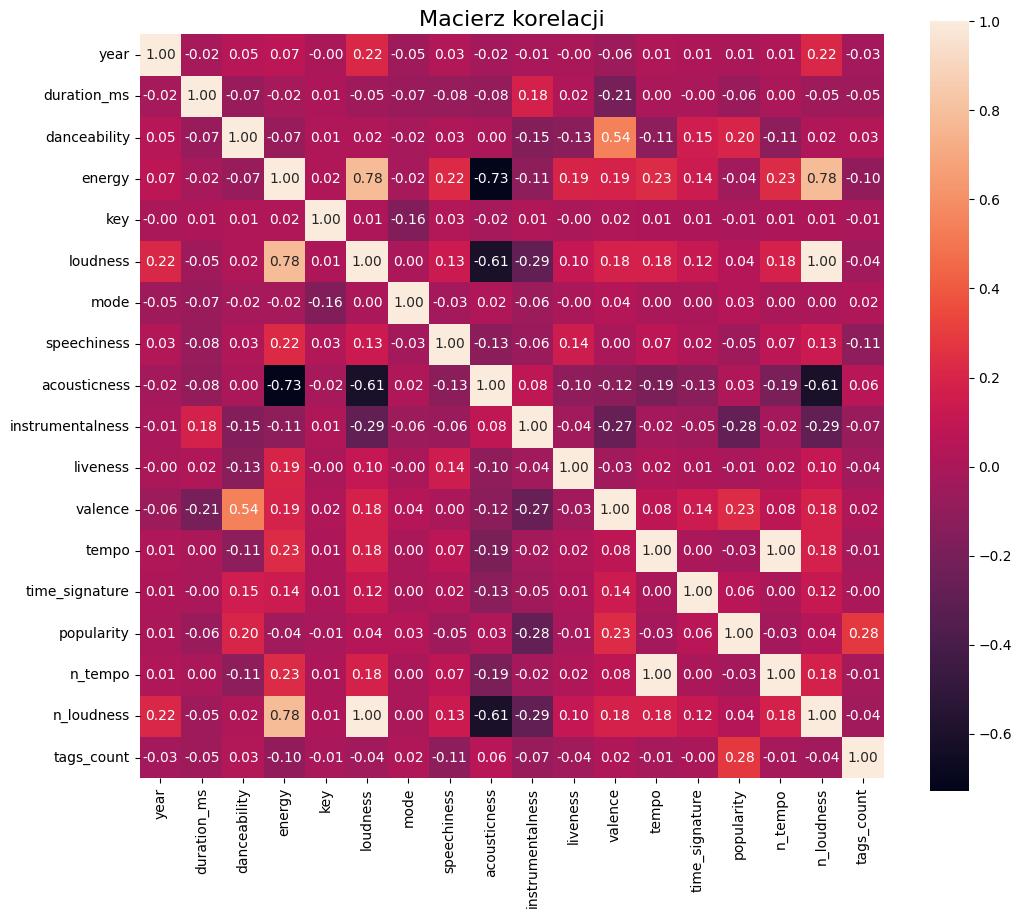

In [ ]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))

numeric_df = numeric_df.drop(columns=cols_to_exclude, errors='ignore')

sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', square=True)
plt.title('Macierz korelacji', fontsize=16)
plt.show()

# Embeddings

Import biblioteki z modelami do embeddingu SBERT

In [ ]:
from sentence_transformers import SentenceTransformer, util

Wybór odpowiedniego modelu

In [ ]:
model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
tags = "rock, alternative, 90s, funk"

contexts = [
    "muzyka do pracy",
    "muzyka do tańca",
    "muzyka do nauki",
    "muzyka na siłownię",
    "muzyka do relaksu"
]

emb_tags = model.encode(tags, convert_to_tensor=True)
emb_contexts = model.encode(contexts, convert_to_tensor=True)

scores = util.cos_sim(emb_tags, emb_contexts)
for i, ctx in enumerate(contexts):
    print(f"{ctx}: {scores[0][i]:.3f}")

muzyka do pracy: 0.530
muzyka do tańca: 0.546
muzyka do nauki: 0.531
muzyka na siłownię: 0.484
muzyka do relaksu: 0.589


In [ ]:
tags = "rock"

contexts = [
    "muzyka do pracy",
    "muzyka do tańca",
    "muzyka do nauki",
    "muzyka na siłownię",
    "muzyka do relaksu",
    "muzyka do gotowania",
]

emb_tags = model.encode(tags, convert_to_tensor=True)
emb_contexts = model.encode(contexts, convert_to_tensor=True)

scores = util.cos_sim(emb_tags, emb_contexts)
for i, ctx in enumerate(contexts):
    print(f"{ctx}: {scores[0][i]:.3f}")

muzyka do pracy: 0.476
muzyka do tańca: 0.459
muzyka do nauki: 0.505
muzyka na siłownię: 0.420
muzyka do relaksu: 0.487
muzyka do gotowania: 0.326
